### Instalacion de las dependencias

In [1]:
# !pip install -q gymnasium

# !pip install gymnasium[toy-text]

In [2]:
import gymnasium as gym
import random
import numpy as np
import matplotlib.pyplot as plt 

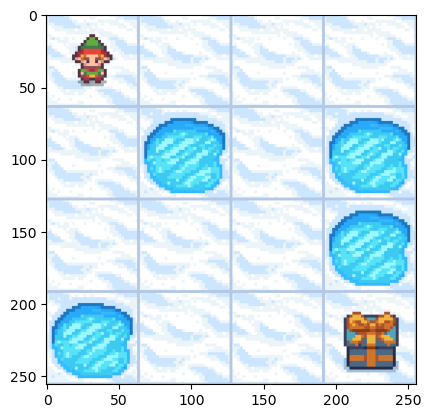

In [3]:
#Para local usar el human, en colab, por ejemplo, usar el rgb_array (new_step_api=True)
environment = gym.make("FrozenLake-v1",is_slippery=False, render_mode="rgb_array")
environment.reset()
environment.render()

#Si no estubieramos en local
tablero = environment.render()
plt.imshow(tablero)

In [4]:
nb_states = environment.observation_space.n
nb_actions = environment.action_space.n
#Segun vamos jugando vamos introduciendo en la tabla de ceros las diferentes acciones que puede tomar en cada estado
qtable = np.zeros((nb_states,nb_actions))
nb_actions

4

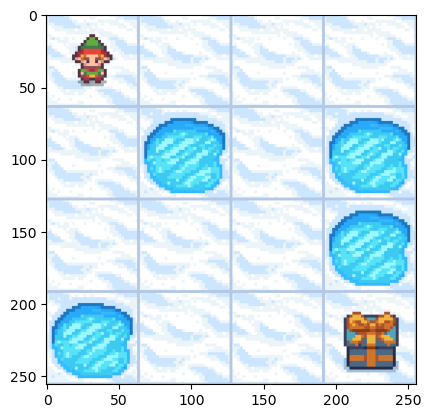

In [5]:
action = 2
environment.step(action)
table = environment.render()
plt.imshow(tablero)

2
0.0
False
False
{'prob': 1.0}


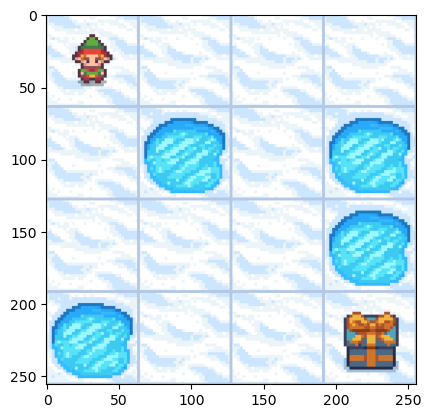

In [6]:
actions = environment.action_space.sample()
new_state,reward,terminated,truncated,info = environment.step(action)

table = environment.render()

plt.imshow(tablero)

print(new_state)
print(reward)
print(terminated)
print(truncated)
print(info)

Q-table before training:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Q-table after training:
[[0.      0.      0.59049 0.     ]
 [0.      0.      0.6561  0.     ]
 [0.      0.729   0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.81    0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.9     0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      0.      0.     ]
 [0.      0.      1.      0.     ]
 [0.      0.      0.      0.     ]]


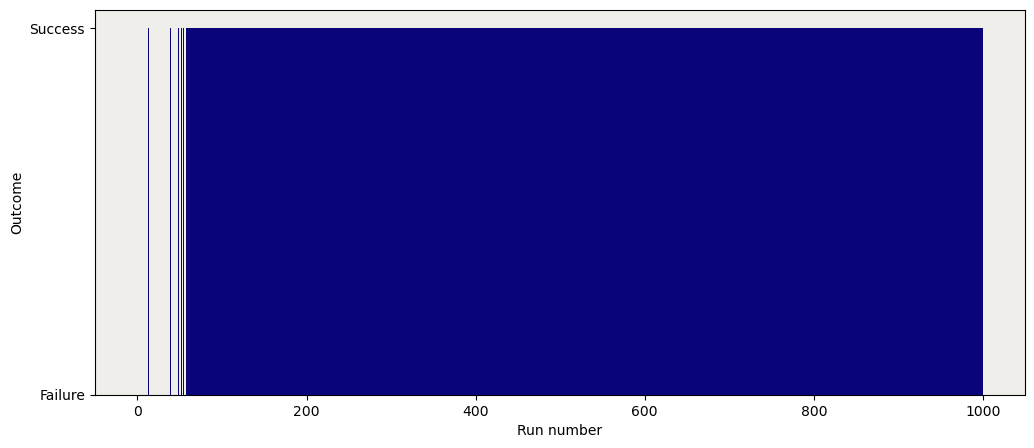

In [8]:
# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))

# Hyperparameters
episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
epsilon = 1.0
epsilon_decay = 0.001

# List of outcomes to plot
outcomes = []

print('Q-table before training:')
print(qtable)


# Training
for _ in range(episodes):
    state = environment.reset()[0]
    done = False

    # By default, we consider our outcome to be a failure
    outcomes.append("Failure")

    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        rnd = np.random.random()

        if rnd < epsilon:
           action = environment.action_space.sample()
        else:
           action = np.argmax(qtable[state])


        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()
             
        # Implement this action and move the agent in the desired direction
        new_state, reward, terminated, truncated, info = environment.step(action)

        #En la nueva version, igualamos el done para saber cuando termina
        done = terminated or truncated
        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])
        
        # Update our current state
        state = new_state

        # If we have a reward, it means that our outcome is a success
        if reward:
          outcomes[-1] = "Success"

    #update epsilon
    epsilon = max(epsilon - epsilon_decay,0)

print()
print('===========================================')
print('Q-table after training:')
print(qtable)

# Plot outcomes
plt.figure(figsize=(12, 5))
plt.xlabel("Run number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor('#efeeea')
plt.bar(range(len(outcomes)), outcomes, color="#0A047A", width=1.0)
plt.show()